In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# 1. Data Preprocessing
# Convert pickup and drop-off datetime to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract relevant time-based features
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

# Drop unnecessary columns
data = data.drop(['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 
                  'dropoff_latitude', 'dropoff_longitude', 'key'], axis=1)

# Handle missing values by dropping rows with NaN
data = data.dropna()



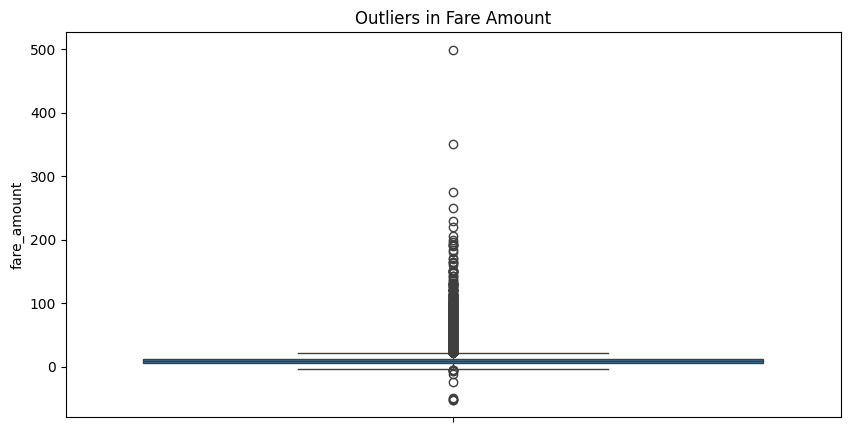

In [6]:
# 2. Identify Outliers using Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data['fare_amount'])
plt.title("Outliers in Fare Amount")
plt.show()

# Remove outliers (assuming fares below $1 or above $100 are outliers)
data = data[(data['fare_amount'] >= 1) & (data['fare_amount'] <= 100)]



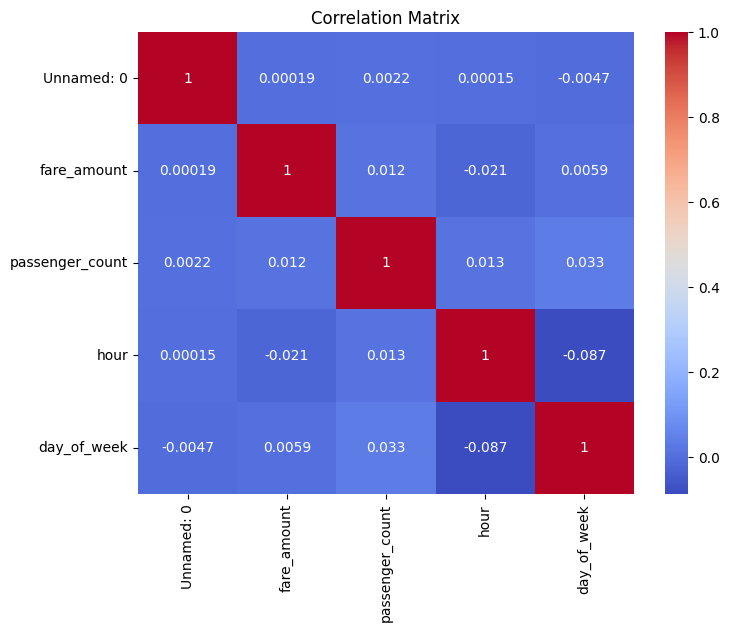

In [7]:
# 3. Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [8]:
# 4. Split the data into train and test sets
X = data.drop('fare_amount', axis=1)  # Features
y = data['fare_amount']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Train the models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)



Linear Regression - R2 Score: 0.0009, RMSE: 9.3822
Ridge Regression - R2 Score: 0.0009, RMSE: 9.3822
Lasso Regression - R2 Score: 0.0009, RMSE: 9.3822


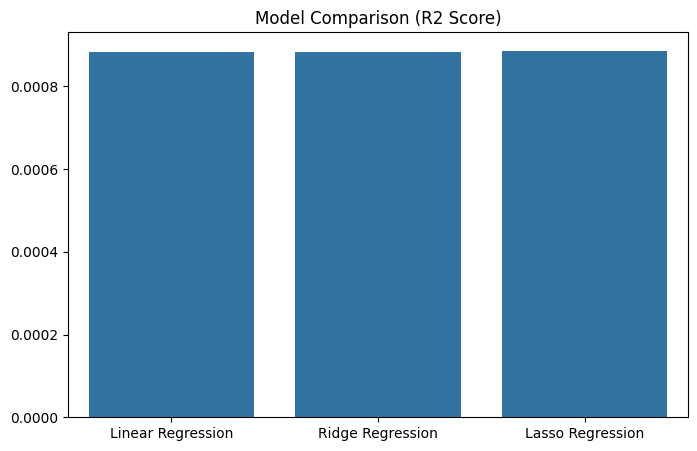

In [9]:
# 5. Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Comparison Plot
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores)
plt.title("Model Comparison (R2 Score)")
plt.show()
